## TF-IDF ve NaiveBayes ile Metin Sınıflandırma

Veri seti Kaggle adresinden alınmıştır.haber metinlerinin hangi kategoriye ait oldugunu bulma

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/türkan şensoy/Desktop/MetinSiniflandirma/7allV03.csv')
df

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...
...,...,...
4895,teknoloji,iphone lara geri dönüyor ios 6 sürümüyle tele...
4896,teknoloji,muslukta devrim sadece elimizi yıkadığımız mu...
4897,teknoloji,halka iyi anlatılmalı bilgi_teknolojileri ile...
4898,teknoloji,çöpe gidiyorlar apple 775 bin uygulamayla app...


In [2]:
#from io import StringIO
col = ['category', 'text'] #sütun çekme
df = df[col] 
# Nan deger içermeyen sütunları görmek için
df = df[pd.notnull(df['text'])]
df

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...
...,...,...
4895,teknoloji,iphone lara geri dönüyor ios 6 sürümüyle tele...
4896,teknoloji,muslukta devrim sadece elimizi yıkadığımız mu...
4897,teknoloji,halka iyi anlatılmalı bilgi_teknolojileri ile...
4898,teknoloji,çöpe gidiyorlar apple 775 bin uygulamayla app...


In [4]:
 #df.columns = ['category', 'body']
df['category_id'] = df['category'].factorize()[0] # category'deki aynı metine sahip olanlara deger verme
df['category_id']

0       0
1       0
2       0
3       0
4       0
       ..
4895    6
4896    6
4897    6
4898    6
4899    6
Name: category_id, Length: 4900, dtype: int64

In [5]:
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,category,category_id
0,siyaset,0
700,dunya,1
1400,ekonomi,2
2100,kultur,3
2800,saglik,4
3500,spor,5
4200,teknoloji,6


In [6]:
category_to_id = dict(category_id_df.values) 
category_to_id

{'siyaset ': 0,
 'dunya ': 1,
 'ekonomi ': 2,
 'kultur ': 3,
 'saglik ': 4,
 'spor ': 5,
 'teknoloji ': 6}

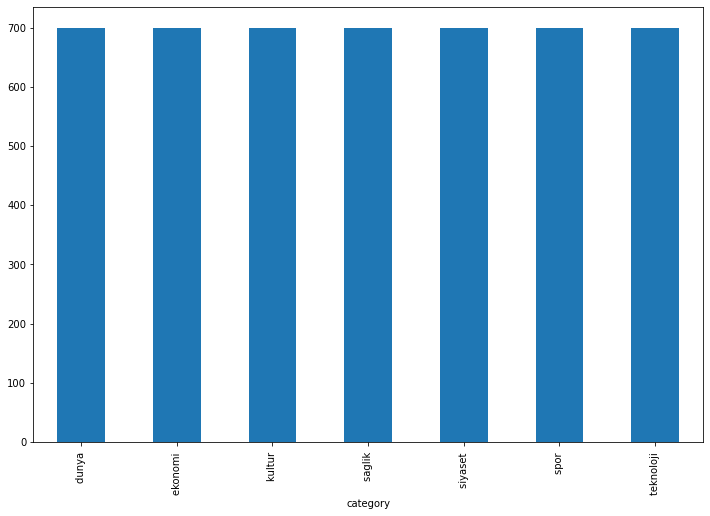

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8)) #boyutunu değiştirmek için
df.groupby('category').text.count().plot.bar(ylim=0)  #her kategoride kac tane metin olduğunu gösteriyor
plt.show()

In [8]:
sw = pd.read_csv('C:/Users/türkan şensoy/Desktop/MetinSiniflandirma/turkce-stop-Words.txt',sep="\n", header=None)
print(sw[0].values.tolist())

['a', 'acaba', 'altı', 'altmış', 'ama', 'ancak', 'arada', 'artık', 'asla', 'aslında', 'aslında', 'ayrıca', 'az', 'bana', 'bazen', 'bazı', 'bazıları', 'belki', 'ben', 'benden', 'beni', 'benim', 'beri', 'beş', 'bile', 'bilhassa', 'bin', 'bir', 'biraz', 'birçoğu', 'birçok', 'biri', 'birisi', 'birkaç', 'birşey', 'biz', 'bizden', 'bize', 'bizi', 'bizim', 'böyle', 'böylece', 'bu', 'buna', 'bunda', 'bundan', 'bunlar', 'bunları', 'bunların', 'bunu', 'bunun', 'burada', 'bütün', 'çoğu', 'çoğunu', 'çok', 'çünkü', 'da', 'daha', 'dahi', 'dan', 'de', 'defa', 'değil', 'diğer', 'diğeri', 'diğerleri', 'diye', 'doksan', 'dokuz', 'dolayı', 'dolayısıyla', 'dört', 'e', 'edecek', 'eden', 'ederek', 'edilecek', 'ediliyor', 'edilmesi', 'ediyor', 'eğer', 'elbette', 'elli', 'en', 'etmesi', 'etti', 'ettiği', 'ettiğini', 'fakat', 'falan', 'filan', 'gene', 'gereği', 'gerek', 'gibi', 'göre', 'hala', 'halde', 'halen', 'hangi', 'hangisi', 'hani', 'hatta', 'hem', 'henüz', 'hep', 'hepsi', 'her', 'herhangi', 'herkes', 'h

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2),stop_words=sw[0].values.tolist())
features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
#labels
print(features)
features.shape
#tfidf.get_feature_names()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(4900, 35155)

In [10]:
#Ki kare kullanarak her kategori ve her gram için en iyi 5 kelimeyi bulalım.
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . En ilişkili unigram ifadeler:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . En ilişkili bigram ifadeler:\n. {}".format('\n. '.join(bigrams[-N:])))
  print("---------------------------")

# 'dunya ':
  . En ilişkili unigram ifadeler:
. hamas
. askeri
. gazze
. suriye
. israil
  . En ilişkili bigram ifadeler:
. büyüklüğünde deprem
. kişi hayatını
. kişi yaralandı
. kişi öldü
. israil in
---------------------------
# 'ekonomi ':
  . En ilişkili unigram ifadeler:
. merkez_bankası
. yatırım
. lira
. kredi
. yüzde
  . En ilişkili bigram ifadeler:
. kredi derecelendirme
. satış fiyatı
. yönetim_kurulu başkanı
. yılın aynı
. endeksi yüzde
---------------------------
# 'kultur ':
  . En ilişkili unigram ifadeler:
. sinema
. yönetmen
. filmi
. sanat
. film
  . En ilişkili bigram ifadeler:
. 20 30
. 2012 22
. 00 tl
. 11 2012
. film festivali
---------------------------
# 'saglik ':
  . En ilişkili unigram ifadeler:
. ilaç
. hastalığı
. kalp
. tedavi
. dr
  . En ilişkili bigram ifadeler:
. kalp damar
. anabilim dalı
. dalı öğretim
. doç dr
. prof dr
---------------------------
# 'siyaset ':
  . En ilişkili unigram ifadeler:
. kılıçdaroğlu
. başbakan_erdoğan
. bdp
. ak_parti
. chp


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
a=X_train_counts.toarray()
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
a[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
count_vect.inverse_transform(a[0])

[array(['1990', '2000', 'almadığını', 'anka', 'açıklamada', 'basına',
        'başvurmuştu', 'bildirdi', 'bir', 'bize', 'brüksel', 'bulunmadı',
        'bunu', 'bölgelerinde', 'böyle', 'dan', 'de', 'dedi', 'den',
        'füze', 'gelseydi', 'göre', 'görüşürlerdi', 'henüz', 'her', 'iki',
        'ile', 'ilgili', 'irak', 'istek', 'kurulması', 'müttefikler',
        'nato', 'nato_genel_sekreteri_anders_fogh_rasmussen', 'nun', 'nın',
        'patriot', 'radyosuna', 'rasmussen', 'rusya', 'savaşı', 'sesi',
        'sisteminin', 'suriye', 'sınır', 'sırasında', 'talebinde', 'talep',
        'türkiye', 'türkiye_nato', 've', 'ya', 'yaptığı', 'ye',
        'yerleştirmele', 'yıllarında', 'ülkede'], dtype='<U63')]

In [14]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [15]:
x_test_tf=count_vect.transform(X_test)
#x_test_tfid= tfidf_transformer.transform(X_test)
predicted=clf.predict(x_test_tf)
predicted

array(['saglik ', 'dunya ', 'kultur ', ..., 'dunya ', 'siyaset ',
       'ekonomi '], dtype='<U10')

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrixx=confusion_matrix(y_test,predicted)
confusion_matrixx

array([[110,   8,   2,   2,  38,   0,   4],
       [  0, 159,   0,   0,  11,   0,   1],
       [  1,   6, 158,   3,  15,   0,   2],
       [  2,   3,   0, 156,   2,   0,   0],
       [  4,   5,   0,   3, 170,   0,   2],
       [  1,   7,   4,   1,  14, 158,   2],
       [  3,  10,   6,  13,   4,   0, 135]], dtype=int64)

In [17]:
print(accuracy_score(y_test, predicted))

0.8538775510204082


In [18]:
print(clf.predict(count_vect.transform(["kupa turnuva"])))

['spor ']


In [19]:
print(clf.predict(count_vect.transform(["dün film izlemeye gittim"])))

['kultur ']


In [21]:
print(clf.predict(count_vect.transform([" çin kendi navigasyon sistemini hizmete soktu çin in kuzey yıldızı beydou navigasyon sisteminin resmen hizmete girdiği bildirildi beydou navigasyon sistemi basın sözcüsü ran çıngçi kuzey yıldızı uydu serisinden sağlanan konumlandırma sisteminin çin den sonra asya_pasifik bölgesindeki kullanıcıların hizmetine açıldığını duyurdu çin in bu sistemle ulaşım meteoroloji ve haberleşme alanlarında hizmet sağlayacağı ve ülkeye yıllık 400 milyar yüen yaklaşık 115 milyar tl pazar geliri getireceği aktarıldı geçen yılın sonlarında bir senelik deneme sürecine başlayan navigasyon sisteminin bu yıl sonu itibariyle yörüngede 16 uydu ile desteklendiğini ve test sürecini başarıyla tamamlandığı kaydedildi 2020 de küresel konumlandırma hizmetine başlanacak abd nin gps rusya nın glonass ve ab nin galileo konumlandırma sisteminin ardından dünyanın en büyük dördüncü büyük kapsamlı navigasyon sistemi olan beydou nun dünyada en yaygın olarak kullanılan gps in kendi konumunu belirleme özelliğine ek olarak başkalarına kendi konumu hakkında bilgi verme ve diğer kullanıcıların konumunu gösterme hizmeti sunacağına dikkat çekiliyor beidou navigasyon uydu sistemi nin bds 2020 yılına kadar yörüngeye fırlatılacak yaklaşık 30 adet kuzey yıldızı serisi konumlandırma uydusu ile desteklenerek küresel çapta navigasyon hizmeti sunabilecek bir ağa sahip olması bekleniyor bds nin ülke adına büyük bir atılım olduğunu savunan uzmanlar bu sistem ile çin in konumlandırma alanında abd ye olan bağımlılığını kıracağı görüşünü paylaşıyor çin de gps halen yüzde 90 ın üzerinde bir pazar payına sahip ülke 2015 yılına kadar bds nin pazar payını yüzde 20 ye ve 2020 yılına kadar ise yüzde 80 e çıkartmayı hedefliyor 2020 yılına kadar uzayda 60 tonluk kalıcı bir istasyon kurma hedefi olan çin in abd ve rusya nın ardından uzayda istasyon kuran üçüncü ülke olması bekleniyor"])))

['teknoloji ']
